In [214]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
from weight_utils import *

## Load pelican weights

In [220]:
in_dir = "/global/ml4hep/spss/twamorkar/PELICAN/predict/"
# in_file = "samedata.best.test.pt"
in_file = "muonlevel1_newsplit.best.test.pt"

# # in_file = "muonlevel1_fix_morestats.best.test.pt"

## Load LorentzNet weights

In [221]:
# in_dir = "/global/ml4hep/spss/twamorkar/LorentzNet-release/logs/top/"
# in_file = "muonlevel1_newsplit/score.npy"

In [222]:
prob_MC, prob_PD, weight_pelican = getweight_pelican(in_dir+in_file)

In [223]:
# prob_MC, prob_PD, weight_LN = getweight_LN(in_dir+in_file)

## Plot MC and PD probability

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
          604.,  3894.,  6746.,  9634., 19664., 36520., 38411., 55908.,
        21548., 15332., 13367., 13167., 11406.,  9911.,  9248.,  9388.,
         8961.,  8262.,  7601.,  6649.,  6241.,  5731.,  4855.,  3887.,
         2228.,  1033.,   410.]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.

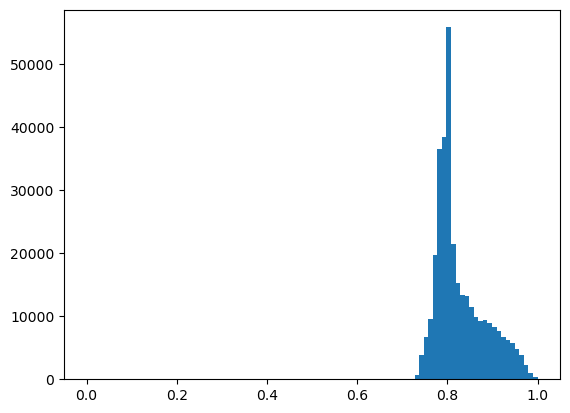

In [224]:
plt.hist(prob_MC, bins=np.linspace(0,1,100))

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.10000e+01, 4.19020e+04, 2.88683e+05,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

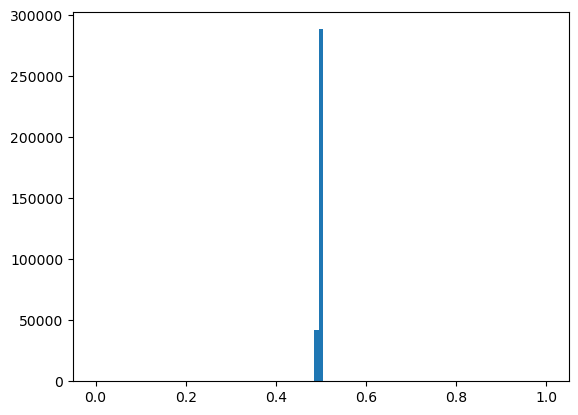

In [225]:
plt.hist(prob_PD, bins=np.linspace(0,1,100))

## Load the test file and get the original weights

In [226]:
## Load testmc
input_testdir = "/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/datasets/"
suffix = "muonlevel3_newsplit/"
# suffix = "samedata/"
input_testfile = input_testdir+suffix+"test.h5"

In [227]:
weight_original = originalweights(input_testfile)

In [228]:
weight_original

array([0.1720199, 0.7602109, 0.6460059, ..., 0.8373235, 1.2349234,
       1.1232759], dtype=float32)

In [229]:
weight_pelican

array([6.82853091, 3.8530224 , 4.04231507, ..., 3.1441481 , 3.19749618,
       3.44781931])

In [230]:
weight_new = weight_original*weight_pelican
# weight_new = weight_original*weight_LN

In [231]:
weight_new

array([1.1746432 , 2.92910952, 2.6113595 , ..., 2.63266905, 3.94866273,
       3.87285226])

In [232]:
weight_original

array([0.1720199, 0.7602109, 0.6460059, ..., 0.8373235, 1.2349234,
       1.1232759], dtype=float32)

Text(0, 0.5, 'A.U.')

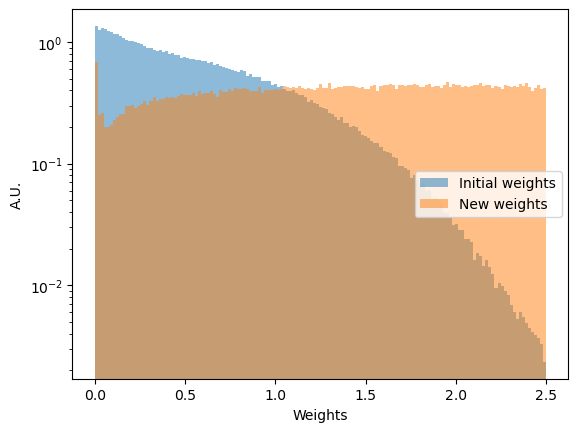

In [233]:
bins = np.linspace(0, 2.5, 150)
plt.hist(weight_original, bins=bins, alpha=0.5, label='Initial weights', density=True)
plt.hist(weight_new, bins=bins, alpha=0.5, label='New weights', density=True)
plt.legend(loc='center right')
plt.yscale('log')
plt.xlabel('Weights')
plt.ylabel('A.U.')

In [234]:
input_testfile=h5py.File(input_testfile,"r")

In [235]:
input_testfile.keys()

<KeysViewHDF5 ['Nobj', 'Pmu', 'eta_l1', 'eta_l2', 'eta_tracks', 'is_signal', 'label', 'pT_l1', 'pT_l2', 'pT_tracks', 'phi_l1', 'phi_l2', 'phi_tracks', 'weight']>

In [236]:
pt_l1=np.array(input_testfile["pT_l1"])
is_signal=np.array(input_testfile["is_signal"])
pt_l1=pt_l1.squeeze()
pt_l1_mc=pt_l1[is_signal==1]
pt_l1_pd=pt_l1[is_signal==0]

phi_l1=np.array(input_testfile["phi_l1"])
phi_l1=phi_l1.squeeze()
phi_l1_mc=phi_l1[is_signal==1]
phi_l1_pd=phi_l1[is_signal==0]

eta_l1=np.array(input_testfile["eta_l1"])
eta_l1=eta_l1.squeeze()
eta_l1_mc=eta_l1[is_signal==1]
eta_l1_pd=eta_l1[is_signal==0]

mc_px_l1 = pt_l1_mc * np.cos(phi_l1_mc)
pd_px_l1 = pt_l1_pd * np.cos(phi_l1_pd)

mc_py_l1 = pt_l1_mc * np.sin(phi_l1_mc)
pd_py_l1 = pt_l1_pd * np.sin(phi_l1_pd)

mc_pz_l1 = pt_l1_mc * np.sinh(eta_l1_mc)
pd_pz_l1 = pt_l1_pd * np.sinh(eta_l1_pd)

mc_e_l1 = np.sqrt(pt_l1_mc**2 * np.cosh(eta_l1_mc)**2 )
pd_e_l1 = np.sqrt(pt_l1_pd**2 * np.cosh(eta_l1_pd)**2 )
    

In [237]:
pt_l2=np.array(input_testfile["pT_l2"])
is_signal=np.array(input_testfile["is_signal"])
pt_l2=pt_l2.squeeze()
pt_l2_mc=pt_l2[is_signal==1]
pt_l2_pd=pt_l2[is_signal==0]

phi_l2=np.array(input_testfile["phi_l2"])
phi_l2=phi_l1.squeeze()
phi_l2_mc=phi_l2[is_signal==1]
phi_l2_pd=phi_l2[is_signal==0]

eta_l2=np.array(input_testfile["eta_l2"])
eta_l2=eta_l2.squeeze()
eta_l2_mc=eta_l2[is_signal==1]
eta_l2_pd=eta_l2[is_signal==0]

mc_px_l2 = pt_l2_mc * np.cos(phi_l2_mc)
pd_px_l2 = pt_l2_pd * np.cos(phi_l2_pd)

mc_py_l2 = pt_l2_mc * np.sin(phi_l2_mc)
pd_py_l2 = pt_l2_pd * np.sin(phi_l2_pd)

mc_pz_l2 = pt_l2_mc * np.sinh(eta_l2_mc)
pd_pz_l2 = pt_l2_pd * np.sinh(eta_l2_pd)

mc_e_l2 = np.sqrt(pt_l2_mc**2 * np.cosh(eta_l2_mc)**2 )
pd_e_l2 = np.sqrt(pt_l2_pd**2 * np.cosh(eta_l2_pd)**2 )

In [238]:
pt_tracks = np.array(input_testfile["pT_tracks"])
pt_tracks_mc=pt_tracks[is_signal==1]
pt_tracks_pd=pt_tracks[is_signal==0]

In [239]:
ntracks_mc = ak.to_numpy(ak.num(pt_tracks_mc, axis=1))


In [240]:
ntracks_mc

array([2, 2, 2, ..., 2, 2, 2])

In [241]:
ht_mc = ak.sum(pt_tracks_mc, axis=1)
ht_pd = ak.sum(pt_tracks_pd, axis=1)



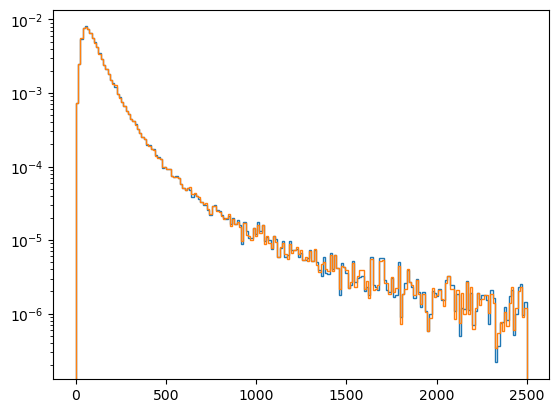

In [250]:
plt.hist(ht_mc, bins=np.linspace(0,2500,200), weights=weight_original, density=True, histtype="step")
plt.hist(ht_mc, bins=np.linspace(0,2500,200), weights=weight_new, density=True, histtype="step")
plt.yscale("log")

[7.20054918e-04 2.50020119e-03 5.51985958e-03 7.58606136e-03
 7.96595603e-03 7.45704685e-03 6.57850489e-03 5.63134284e-03
 4.83711820e-03 4.18075926e-03 3.43647017e-03 2.89101033e-03
 2.43658687e-03 2.09158784e-03 1.81366231e-03 1.51334023e-03
 1.34393109e-03 1.27266431e-03 9.60566970e-04 8.64737058e-04
 7.63018855e-04 6.60210651e-04 5.73870698e-04 5.10610379e-04
 4.45663753e-04 4.11641998e-04 3.65485987e-04 3.24573852e-04
 2.84844728e-04 2.52256792e-04 2.37211636e-04 1.99717464e-04
 1.91089244e-04 1.72702333e-04 1.68437854e-04 1.40905642e-04
 1.31484241e-04 1.26441497e-04 9.88295438e-05 9.88007670e-05
 9.16278079e-05 9.22509074e-05 7.46953085e-05 7.12355752e-05
 7.14823552e-05 6.90998864e-05 5.85106783e-05 5.11118724e-05
 4.77792208e-05 5.13063900e-05 5.28235825e-05 4.16749439e-05
 4.29917289e-05 3.99416744e-05 3.87622422e-05 3.30706022e-05
 3.04675749e-05 3.22505058e-05 2.60340574e-05 2.28133669e-05
 2.92300620e-05 2.92515083e-05 2.44622887e-05 2.37940042e-05
 2.15024484e-05 1.947528

/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:76: RuntimeWarning: divide by zero encountered in divide
  axr.plot(bins[:-1], n_mc / n_pd, color='#1f77b4', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:78: RuntimeWarning: divide by zero encountered in divide
  axr.plot(bins[:-1], n_rw / n_pd, color='k', drawstyle='steps-post')


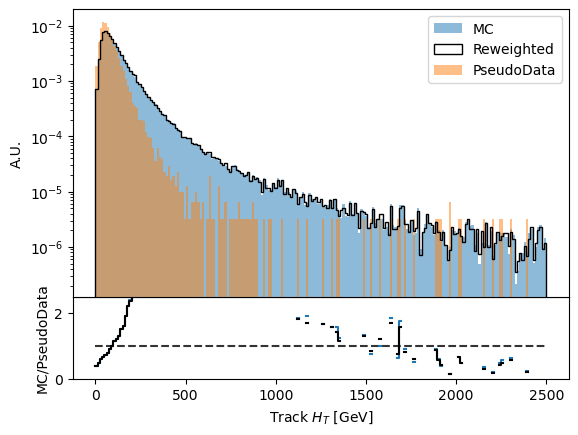

In [242]:
fig = plot_reweighting(np.array(ht_mc), np.array(ht_pd), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(0,2500, 200), xlabel=r'Track $H_{T}$ [GeV]', rlim=[0, 2.5])

[1.33476919e-05 1.51508912e-05 1.63169893e-05 1.35066870e-05
 1.59070696e-05 1.79420762e-05 1.80022685e-05 1.64165775e-05
 1.90737760e-05 2.47652071e-05 1.72533697e-05 2.48064293e-05
 2.47115166e-05 2.97790142e-05 3.34795551e-05 3.46424825e-05
 3.26942253e-05 3.66911422e-05 4.26342854e-05 3.91429870e-05
 4.50760600e-05 4.06622928e-05 4.69655521e-05 4.16694061e-05
 5.33860584e-05 6.05063550e-05 6.59064069e-05 7.98417858e-05
 7.53200651e-05 8.24513863e-05 8.19958275e-05 9.92764868e-05
 1.02551458e-04 1.09089196e-04 1.19414948e-04 1.31335764e-04
 1.39704670e-04 1.45385288e-04 1.57242568e-04 1.91720154e-04
 1.89564764e-04 2.11465657e-04 2.37363453e-04 2.36986761e-04
 2.48068999e-04 2.92043641e-04 3.35735307e-04 3.64421229e-04
 3.76960270e-04 4.40669534e-04 4.83156813e-04 4.61430095e-04
 5.56765745e-04 6.01768235e-04 6.73183140e-04 7.65210789e-04
 8.14970121e-04 9.12226330e-04 1.07198987e-03 1.17913749e-03
 1.29389857e-03 1.51741640e-03 1.63357722e-03 1.75283217e-03
 1.96880416e-03 2.137882

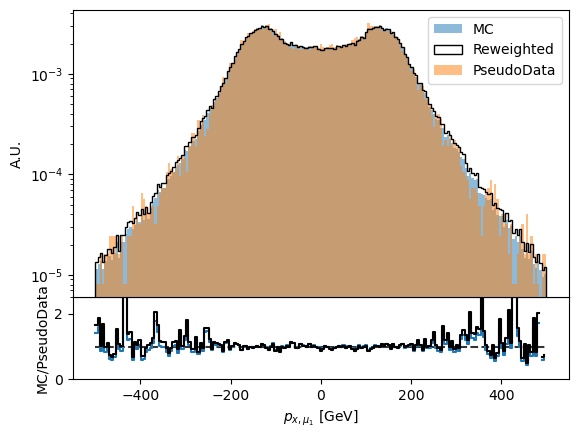

In [155]:
fig = plot_reweighting(np.array(mc_px_l1), np.array(pd_px_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{x, \mu_1}$ [GeV]', rlim=[0, 2.5])

ValueError: weights should have the same shape as x

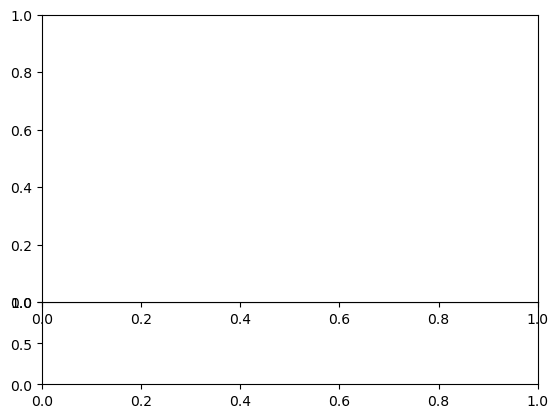

In [132]:
fig = plot_reweighting(np.array(mc_px_l2), np.array(pd_px_l2), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{x, \mu_2}$ [GeV]', rlim=[0, 2.5])

[1.38166346e-05 1.09367057e-05 7.74083107e-06 1.67242413e-05
 1.28347289e-05 1.46128944e-05 1.12047169e-05 1.58695112e-05
 1.39981427e-05 1.72331810e-05 1.66537058e-05 2.71559038e-05
 1.82493946e-05 2.07230096e-05 1.58390144e-05 1.68549067e-05
 2.54182855e-05 5.89100152e-05 2.80766573e-05 2.63808379e-05
 3.05445108e-05 3.50505225e-05 3.97758121e-05 3.94978802e-05
 3.47047585e-05 4.82391034e-05 5.61478033e-05 7.86415082e-05
 5.57500240e-05 6.05801767e-05 7.08566029e-05 9.54242373e-05
 1.09385379e-04 1.21994042e-04 9.66345348e-05 9.95792777e-05
 1.10621545e-04 1.28445030e-04 1.48917397e-04 1.80262651e-04
 1.82575026e-04 1.64046879e-04 1.87193775e-04 2.28437304e-04
 2.05408598e-04 2.34688702e-04 2.84068615e-04 3.20260983e-04
 3.24045657e-04 3.84336354e-04 4.91911589e-04 4.90269424e-04
 5.61062202e-04 6.43891925e-04 6.89806098e-04 7.48516458e-04
 7.86173691e-04 8.29185002e-04 8.94591019e-04 1.10517463e-03
 1.27863678e-03 1.44697578e-03 1.59197412e-03 1.71098411e-03
 1.92044292e-03 2.255718

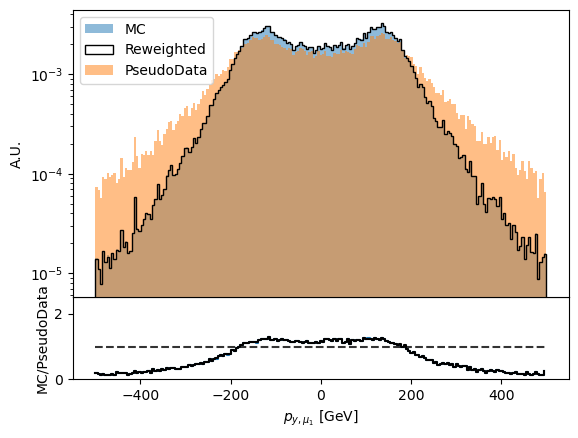

In [133]:
fig = plot_reweighting(np.array(mc_py_l1), np.array(pd_py_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{y, \mu_1}$ [GeV]', rlim=[0, 2.5])

[0.00036515 0.00049494 0.0004008  0.00048732 0.00040395 0.00044648
 0.00048138 0.00044252 0.00052146 0.00041129 0.00046035 0.0004268
 0.00046185 0.00054405 0.00046257 0.00054478 0.00057134 0.00059943
 0.00055975 0.00062557 0.0005656  0.00054446 0.00058067 0.00059347
 0.00064234 0.0005429  0.00062033 0.00058274 0.00059313 0.00067737
 0.00070181 0.00066126 0.00068322 0.00073781 0.00064074 0.000711
 0.00069735 0.00074285 0.00080794 0.00084511 0.00087687 0.00079461
 0.00083415 0.00087078 0.00088455 0.00085661 0.00097992 0.00095858
 0.0010268  0.00093505 0.00092505 0.00101191 0.00099171 0.00098451
 0.00104564 0.00110124 0.00101137 0.00110145 0.00119841 0.00104404
 0.00118092 0.00104731 0.00115535 0.00120229 0.0011393  0.00125884
 0.00120448 0.00128204 0.00128336 0.00118883 0.0013161  0.00139065
 0.0012774  0.00138739 0.00135396 0.00129226 0.00139963 0.00152686
 0.00158281 0.00147826 0.00159076 0.00159574 0.00150639 0.00159644
 0.00171546 0.00159208 0.00160703 0.0018399  0.00172448 0.0019337

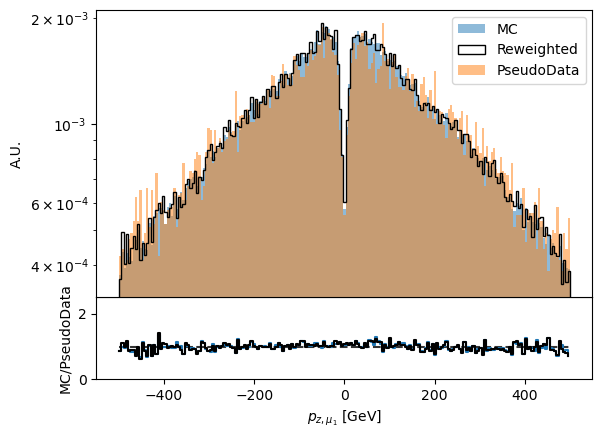

In [82]:
fig = plot_reweighting(np.array(mc_pz_l1), np.array(pd_pz_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-500,500, 200), xlabel=r'$p_{z, \mu_1}$ [GeV]', rlim=[0, 2.5])


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.80106107e-06 4.96476493e-04 1.64152223e-03 2.62238148e-03
 3.45474166e-03 3.74571350e-03 3.50685171e-03 3.06473333e-03
 2.81380153e-03 2.49514196e-03 2.29299064e-03 1.99777276e-03
 1.82400661e-03 1.66385567e-03 1.47646881e-03 1.29853635e-03
 1.25078049e-03 1.14962326e-03 1.06319568e-03 9.49618332e-04
 8.94911899e-04 8.17905712e-04 7.24952800e-04 6.75803893e-04
 7.02491746e-04 6.06100206e-04 5.55807533e-04 5.12124504e-04
 4.50489493e-04 4.16917054e-04 3.96036009e-04 3.66554729e-04
 3.28099293e-04 3.10268287e-04 2.85992606e-04 2.56969565e-04
 2.22685939e-04 2.22011411e-04 1.99209426e-04 1.80986168e-04
 1.65167750e-04 1.36709261e-04 1.47318415e-04 1.39055445e-04
 1.02293661e-04 1.15238003e-04 8.97415719e-05 8.19698344e-05
 7.54078486e-05 6.52642649e-05 6.33066668e-05 5.54066224e-05
 4.63958061e-05 4.33530976e-05 4.45775128e-05 4.11755447e-05
 3.06287105e-05 2.95179386e-05 2.37661197e-05 2.74980200e-05
 1.99865625e-05 2.537179

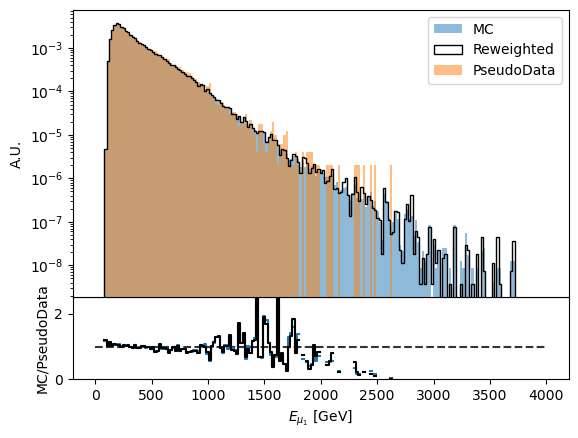

In [83]:
fig = plot_reweighting(np.array(mc_e_l1), np.array(pd_e_l1), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(0,4000, 200), xlabel=r'$E_{\mu_1}$ [GeV]', rlim=[0, 2.5])


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.47759181e-04
 1.05668862e-03 2.52147708e-03 3.88586136e-03 4.93684250e-03
 5.50789617e-03 6.42964200e-03 6.63767384e-03 7.54539799e-03
 7.85765473e-03 8.11778069e-03 8.33905512e-03 8.91875937e-03
 8.84749430e-03 9.37765983e-03 9.24320282e-03 8.95231313e-03
 8.45148514e-03 7.45746235e-03 6.87375453e-03 6.08576912e-03
 5.51814158e-03 4.94347479e-03 4.31726016e-03 4.01526166e-03
 3.47793222e-03 3.12611636e-03 3.02522044e-03 2.56923834e-03
 2.34983371e-03 2.15252940e-03 2.08496726e-03 1.85465179e-03
 1.65302127e-03 1.41233757e-03 1.41098838e-03 1.24393817e-03
 1.18464715e-03 1.11500257e-03 9.70008682e-04 9.42306299e-04
 8.32713972e-04 7.87120162e-04 7.28298427e-04 6.84097802e-04
 5.86897488e-04 5.773798

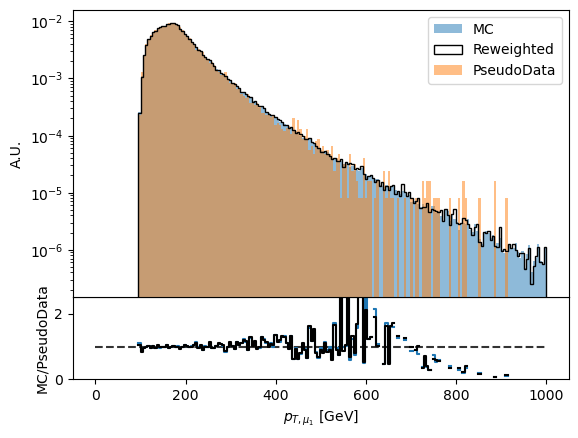

In [84]:
fig = plot_reweighting(np.array(pt_l1_mc), np.array(pt_l1_pd), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(0, 1e3, 200), xlabel=r'$p_{T, \mu_1}$ [GeV]', rlim=[0, 2.5])


[0.         0.         0.         0.00093749 0.07252125 0.0808751
 0.07811852 0.08464462 0.08561056 0.08684029 0.08320311 0.08908236
 0.09328106 0.1104273  0.0949134  0.10829388 0.12747025 0.11511109
 0.12126139 0.12893789 0.13875501 0.15060011 0.13620336 0.14957733
 0.16525037 0.15789289 0.17084473 0.16032357 0.17217105 0.18230436
 0.1707265  0.1723351  0.18468115 0.1896019  0.20121587 0.20324495
 0.19178935 0.19402775 0.20876764 0.20551964 0.23287685 0.23482198
 0.23581875 0.25679361 0.24761087 0.25759754 0.24367442 0.23274928
 0.23326911 0.23768139 0.26650937 0.25928239 0.26534141 0.26624689
 0.25605053 0.23748123 0.25095638 0.22935098 0.27266443 0.22796454
 0.21948602 0.2612048  0.26033818 0.25990633 0.25533348 0.25188092
 0.26982555 0.25371828 0.2566862  0.23826427 0.23213854 0.2561693
 0.25271602 0.24428296 0.25001058 0.25983521 0.27928652 0.26758788
 0.27362636 0.29471853 0.27869265 0.2581049  0.24761161 0.24947975
 0.26711717 0.25533494 0.26894573 0.2903869  0.27866919 0.280178

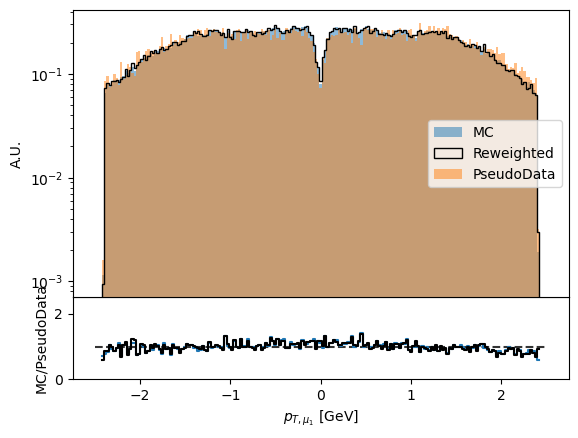

In [85]:
fig = plot_reweighting(np.array(eta_l1_mc), np.array(eta_l1_pd), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-2.5, 2.5, 200), xlabel=r'$p_{T, \mu_1}$ [GeV]', rlim=[0, 2.5])


[0.         0.         0.         0.0017178  0.07132096 0.08129843
 0.0896755  0.08796413 0.0948814  0.09841976 0.10133667 0.09433558
 0.1103752  0.11383771 0.10864657 0.11693718 0.11586832 0.11873224
 0.13118774 0.13281441 0.13757185 0.1325636  0.145142   0.14456867
 0.15314326 0.14810086 0.16104154 0.17628337 0.15800028 0.16876235
 0.16984303 0.17981712 0.18458394 0.18912575 0.18826541 0.18942304
 0.20149163 0.20560495 0.21843825 0.2246571  0.21849318 0.22066755
 0.22867086 0.23046073 0.23558178 0.24144705 0.25123786 0.22994176
 0.24594815 0.25224002 0.24651411 0.24581879 0.24470339 0.24549666
 0.25416133 0.24372461 0.24776013 0.23088513 0.23408864 0.2176342
 0.2255633  0.24634194 0.24045767 0.25622531 0.25350237 0.25619606
 0.25907961 0.26240547 0.24286566 0.23972431 0.24065046 0.24818878
 0.25436343 0.25579656 0.25669367 0.26645123 0.2609252  0.26372553
 0.28208298 0.27655185 0.25767674 0.24801024 0.25784667 0.26104595
 0.25338167 0.26482472 0.27179068 0.28184537 0.26949672 0.27788

/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:76: RuntimeWarning: invalid value encountered in divide
  axr.plot(bins[:-1], n_mc / n_pd, color='#1f77b4', drawstyle='steps-post')
/global/ml4hep/spss/twamorkar/equivariant_unfolding/scripts/weight_utils.py:78: RuntimeWarning: invalid value encountered in divide
  axr.plot(bins[:-1], n_rw / n_pd, color='k', drawstyle='steps-post')


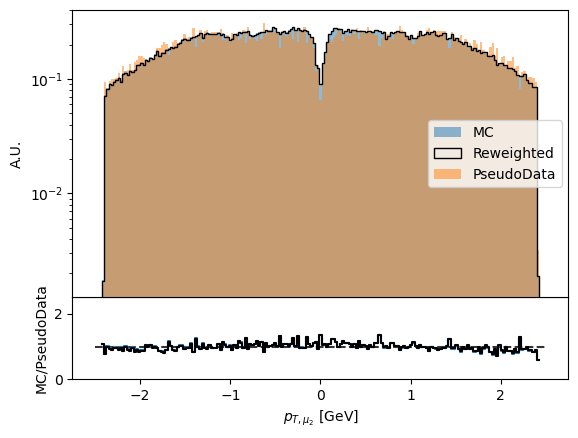

In [156]:
fig = plot_reweighting(np.array(eta_l2_mc), np.array(eta_l2_pd), source_weight_start=weight_original, source_weight_end=weight_new, bins=np.linspace(-2.5, 2.5, 200), xlabel=r'$p_{T, \mu_2}$ [GeV]', rlim=[0, 2.5])


In [251]:
v1_mc = np.stack([pt_l1_mc * np.cos(phi_l1_mc), pt_l1_mc * np.sin(phi_l1_mc), pt_l1_mc * np.sinh(eta_l1_mc)], axis=1)


In [252]:
v1

array([[ 184.63068 ,  229.75337 ,  -34.683926],
       [ -98.576225,  126.990166,   51.205486],
       [-128.63545 ,  136.6153  ,  245.60367 ],
       ...,
       [  99.66792 ,  -66.05414 ,  -66.562126],
       [ 121.09262 ,   59.946968, -364.18692 ],
       [ 134.96748 ,   23.05996 , -575.55176 ]], dtype=float32)